<a href="https://colab.research.google.com/github/binayak13swain/MCA-activitys-assingment-/blob/main/CAT_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog -p "/content/drive/MyDrive/Colab Notebooks"

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 91% 199M/218M [00:01<00:00, 216MB/s]
100% 218M/218M [00:01<00:00, 181MB/s]


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/cat-and-dog.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'

In [ ]:
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3),padding='same'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')

])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = 15,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/15
100/100 [==============================] - 30s 291ms/step - loss: 0.7717 - accuracy: 0.5209 - val_loss: 0.6721 - val_accuracy: 0.5781
Epoch 2/15
100/100 [==============================] - 29s 291ms/step - loss: 0.6655 - accuracy: 0.6097 - val_loss: 0.6324 - val_accuracy: 0.6413
Epoch 3/15
100/100 [==============================] - 29s 285ms/step - loss: 0.6321 - accuracy: 0.6544 - val_loss: 0.5982 - val_accuracy: 0.6812
Epoch 4/15
100/100 [==============================] - 28s 284ms/step - loss: 0.6097 - accuracy: 0.6659 - val_loss: 0.6346 - val_accuracy: 0.6313
Epoch 5/15
100/100 [==============================] - 29s 286ms/step - loss: 0.5783 - accuracy: 0.6853 - val_loss: 0.5429 - val_accuracy: 0.7406
Epoch 6/15
100/100 [==============================] - 29s 289ms/step - loss: 0.5586 - accuracy: 0.7119 - val_loss: 0.5198 - val_accuracy: 0.7400
Epoch 7/15
100/100 [==============================] - 29s 288ms/step - loss: 0.5351 - accuracy: 0.7325 - val_loss: 0.5409 - val_ac

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f"validation accuracy: {accuracy * 100:.2f}%")

64/64 [==============================] - 4s 61ms/step - loss: 0.4650 - accuracy: 0.7924
validation accuracy: 79.24%


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/cat_dog_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


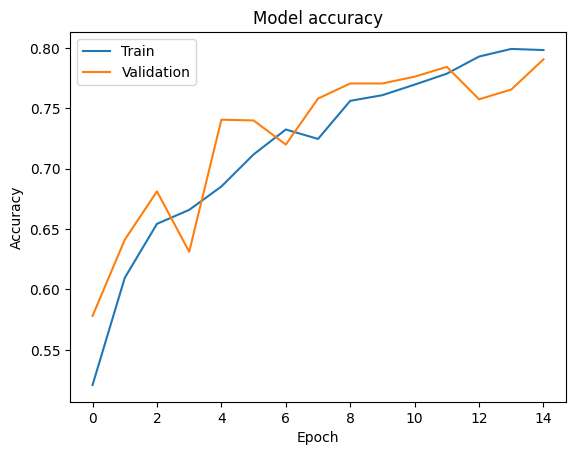

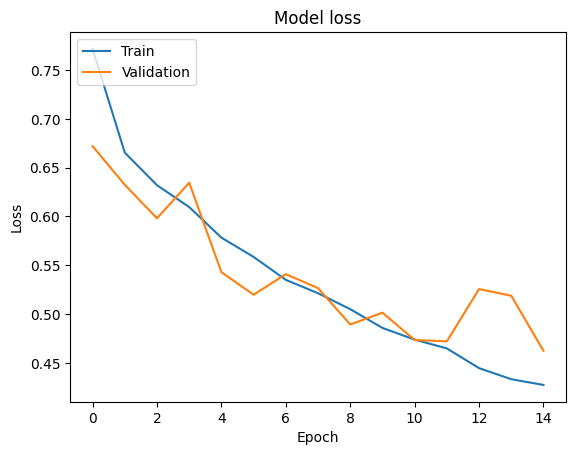

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()